### Lognormal model

### 對數模式

In [21]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

import nothinkstats2
import nothinkplot

import brfss

In [22]:
df = brfss.ReadBrfss()
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0


In [23]:
weights = df.wtkg2.dropna()

In [24]:
def MakeNormalModel(weights):
    cdf = thinkstats2.Cdf(weights, label='weights')
    
    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)
    
    xmin = mean - 4 * std
    xmax = mean + 4 * std
    
    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    
    thinkplot.Cdf(cdf)

n, mean, std 398484 78.59599565702814 17.754555191798705


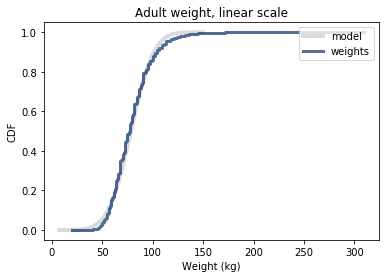

In [25]:
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='Weight (kg)',
                ylabel='CDF', loc='upper right')

n, mean, std 398484 1.884660713731975 0.09623580259151372


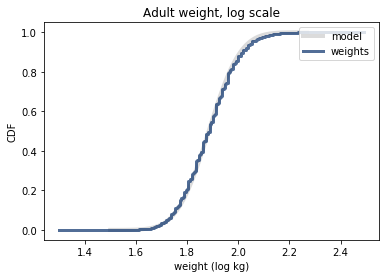

In [26]:
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(title='Adult weight, log scale', xlabel='weight (log kg)',
                ylabel='CDF', loc='upper right')

#### Normal Probability Plot in Log 

In [27]:
def MakeNormalPlot(weights):
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)
    
    xs = [-5,5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

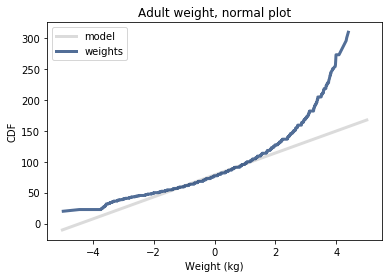

In [28]:
MakeNormalPlot(weights)
thinkplot.Config(title='Adult weight, normal plot', xlabel='Weight (kg)',
                ylabel='CDF', loc='upper left')

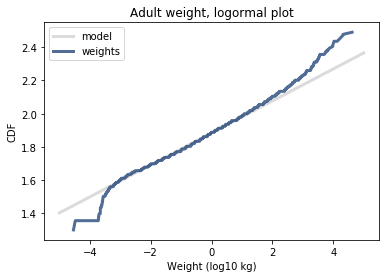

In [29]:
MakeNormalPlot(log_weights)
thinkplot.Config(title='Adult weight, logormal plot', xlabel='Weight (log10 kg)',
                ylabel='CDF', loc='upper left')

### Play Time

In [30]:
import neverthinkstats2

In [32]:
mpgdf = neverthinkstats2.ReadmpgData()
mpgdf

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
5      2.8
6      3.1
7      1.8
8      1.8
9      2.0
10     2.0
11     2.8
12     2.8
13     3.1
14     3.1
15     2.8
16     3.1
17     4.2
18     5.3
19     5.3
20     5.3
21     5.7
22     6.0
23     5.7
24     5.7
25     6.2
26     6.2
27     7.0
28     5.3
29     5.3
      ... 
204    3.4
205    4.0
206    4.0
207    2.0
208    2.0
209    2.0
210    2.0
211    2.8
212    1.9
213    2.0
214    2.0
215    2.0
216    2.0
217    2.5
218    2.5
219    2.8
220    2.8
221    1.9
222    1.9
223    2.0
224    2.0
225    2.5
226    2.5
227    1.8
228    1.8
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6
Name: displ, Length: 234, dtype: float64


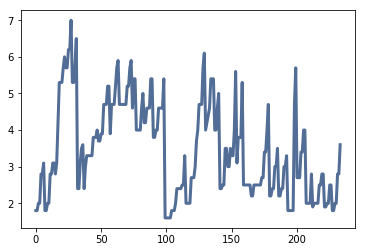

In [50]:
displ = mpgdf.displ
print(displ)
thinkplot.plot(displ)

In [47]:
def MakeNoNormalModel(somedata, somelabel):
    somedata_cdf = thinkstats2.Cdf(somedata, label=somelabel)
    thinkplot.Cdf(somedata_cdf)

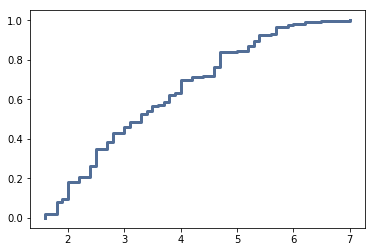

In [48]:
MakeNoNormalModel(displ, 'displ')displ

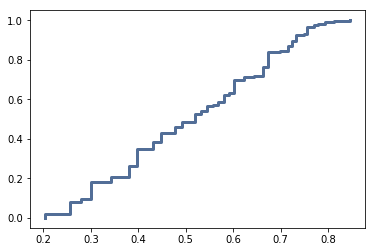

In [49]:
log_displ = np.log10(displ)
MakeNoNormalModel(log_displ, 'Log displ')

In [54]:
def MakeNoNormalPlot(somedata, somelabel):
    xs, ys = thinkstats2.NormalProbability(somedata)
    thinkplot.Plot(xs, ys, label= somelabel)

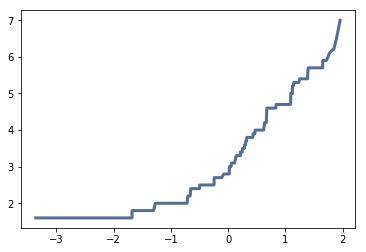

In [55]:
MakeNoNormalPlot(displ, "displ")

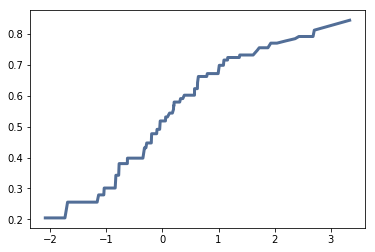

In [56]:
MakeNoNormalPlot(log_displ, "displ")